<a href="https://colab.research.google.com/github/ReganovaLisa/BCI_Skoltech_september2021/blob/main/%22%D0%A3%D1%81%D1%82%D0%BE%D0%B9%D1%87%D0%B8%D0%B2%D1%8B%D0%B9_%D0%B7%D1%80%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B2%D1%8B%D0%B7%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D0%B9_%D0%BF%D0%BE%D1%82%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Установка MNE


In [ ]:
%pip install mne

     |████████████████████████████████| 6.9 MB 18.4 MB/s 


Зачем нужен Python MNE
- Программный пакет для работы с EEG/MEG/EMG/ECG/ECoG и NIRS данными
- Включает рутины чтения/записи, предобработки, сегментации и визуализации данных - все, что нужно в EDA
- Также включает специфические для электрофизиологии алгоритмы машинного обучения

! Очень популярен, большое сообщество

Аналоги MATLAB
- Fieldtrip
- EEGLAB
- ERPLAB

# Основные библиотеки помимо MNE
- matplotlib — визуализация данных, ipympl — плагин для jupyter
- numpy — работа матрицами
- pandas — работа с таблицами (похоже на MS Excel, но программно)
- scipy.stats — статистика
- scikit-learn (sklearn) — для работы с моделями машинного обучения

~обычно, все это уже есть в Google Colab, а если нет, то  
```%pip install %package_name%```

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

import mne
import numpy as np
import pandas as pd

# Создание объекта сырых данных

In [ ]:
from scipy.stats import norm

In [ ]:
sfreq = 1000 # Hz
times = np.arange(10000)/sfreq

data = np.stack([np.sin(w*times)*10*1e-6 + norm.rvs(size=times.shape)*2e-6 for w in [15,50,2,15,0.5]], axis=0)
data[[0,1,3]] *= np.cos(0.5*times)
data.shape

(5, 10000)

In [ ]:
raw = mne.io.RawArray(data, mne.create_info(['eeg_ch', 'emg_ch', 'ecg_ch', 'ecog_ch', 'resp'], 
                                            sfreq, ch_types=['eeg', 'emg', 'ecg', 'ecog', 'resp']))

Creating RawArray with float64 data, n_channels=5, n_times=10000
    Range : 0 ... 9999 =      0.000 ...     9.999 secs
Ready.


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


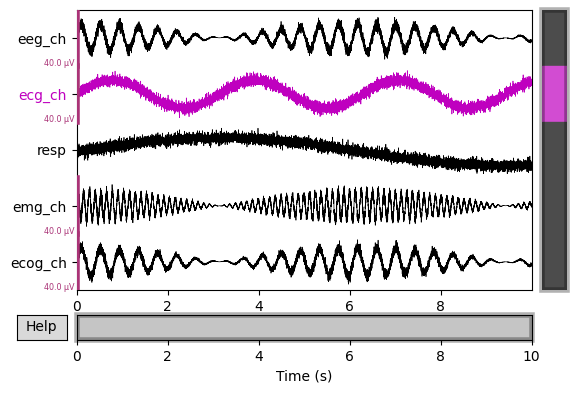

In [ ]:
raw.plot(scalings={'eeg': 20e-6, 
                   'emg': 20e-6, 
                   'ecg': 20e-6, 
                   'ecog':20e-6, 
                   'resp':20e-6});

# Добавим события

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


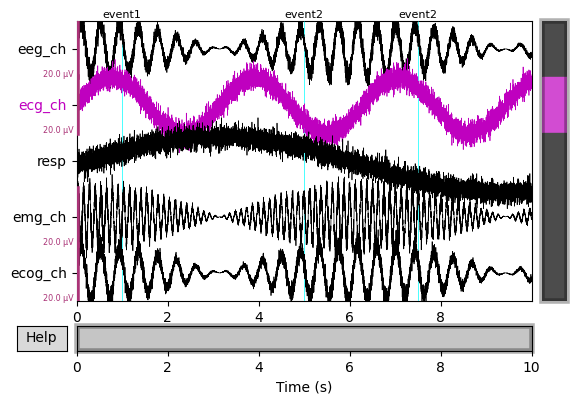

In [ ]:
events = np.array([[1000, 0, 1],
                   [5000, 0, 2],
                   [7500, 0, 2]])
events_id = {'event1':1, 'event2':2}

raw.plot(scalings={'eeg':10e-6, 
                   'emg':10e-6, 
                   'ecg':10e-6, 
                   'ecog':10e-6, 
                   'resp':10e-6}, 
         events=events, 
         event_id=events_id);

## Сегментация данных на эпохи


In [ ]:
epochs = mne.Epochs(raw, 
                    events = events, 
                    event_id=events_id, 
                    tmin=-1, 
                    tmax=2, 
                    picks='all',
                    preload=True)
epochs

Not setting metadata
Not setting metadata
3 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 3 events and 3001 original time points ...
0 bad epochs dropped


Number of events,3
Events,event1: 1event2: 2
Time range,-1.000 – 2.000 sec
Baseline,-1.000 – 0.000 sec


In [ ]:
epochs._data.shape, epochs.get_data().shape

((3, 5, 3001), (3, 5, 3001))

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


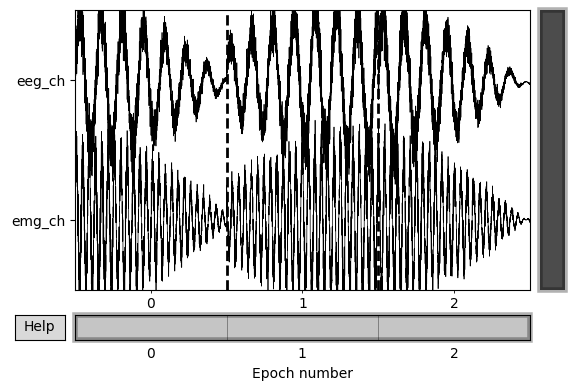

In [ ]:
epochs.plot(scalings={'eeg':10e-6, 
                      'emg':10e-6, 
                      'ecg':10e-6, 
                      'ecog':10e-6, 
                      'resp':10e-6},
            picks=['emg','eeg']);

# Чтение данных эксперимента

Как выглядит эксперимент - https://www.youtube.com/watch?v=t96rl1SFHlI

Origin: https://mne.tools/stable/auto_tutorials/time-freq/50_ssvep.html

In [ ]:
data_path = mne.datasets.ssvep.data_path()
bids_fname = data_path + '/sub-02/ses-01/eeg/sub-02_ses-01_task-ssvep_eeg.vhdr'

raw = mne.io.read_raw_brainvision(bids_fname, 
                                  preload=True, 
                                  verbose=False) # подкачает недостающие данные

In [ ]:
# объект сырых данных
raw

<RawBrainVision | sub-02_ses-01_task-ssvep_eeg.eeg, 32 x 467580 (467.6 s), ~114.2 MB, data loaded>

# Система размещения электродов (montage, мАнтаж)

Creating RawArray with float64 data, n_channels=74, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


<RawBrainVision | sub-02_ses-01_task-ssvep_eeg.eeg, 32 x 467580 (467.6 s), ~114.2 MB, data loaded>

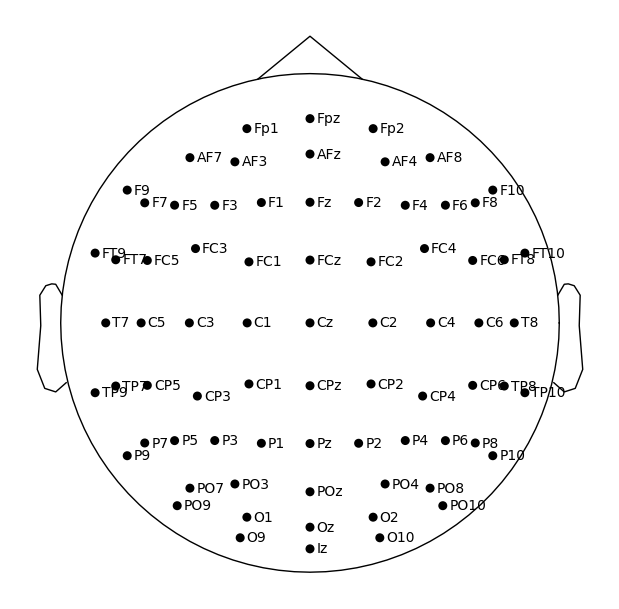

In [ ]:
montage = mne.channels.make_standard_montage('easycap-M1')
fig = montage.plot(show=False, 
                   verbose=True)
fig.set_size_inches(6,6)
fig.show()

raw.set_montage(montage, verbose=False)

Основные обозначения электродов  
F — frontal, фронтальные  
C — central, центральные  
T — temporal, височные  
P — parietal, теменные  
O — occipital, затылочные  
z — zero, нулевые электроды, по центру между полушариями

Nasion, Inion — Назион (самая фронтальная точка, у переносицы), Инион (самая затылочная точка)

Creating RawArray with float64 data, n_channels=74, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


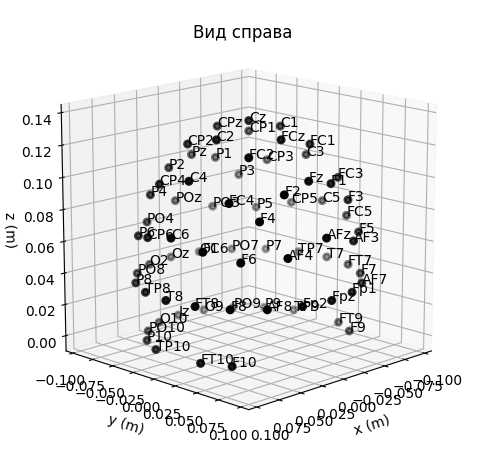

In [ ]:
fig = montage.plot(show=False, 
                   verbose=True, kind='3d')
fig.gca().set_title('Вид cправа')
fig.gca().view_init(azim=45, elev=15)  # set view angle

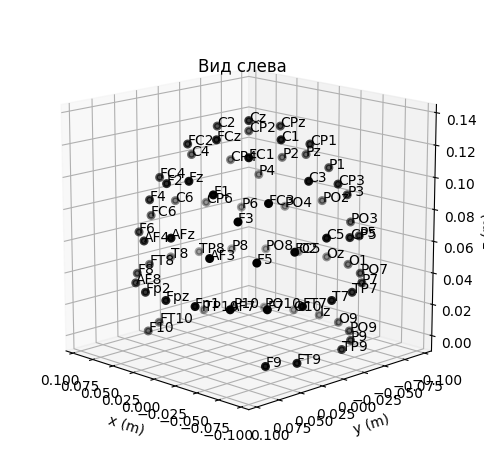

In [ ]:
fig.gca().view_init(azim=135, elev=15)  # set view angle
fig.gca().set_title('Вид слева')
fig


# Визуализация данных

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


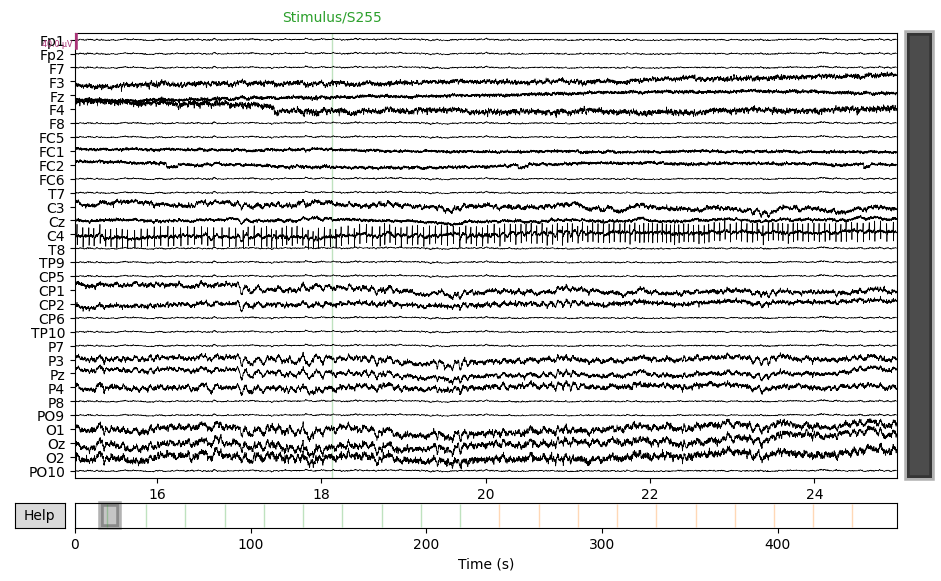

In [ ]:
fig = raw.plot(start=15, 
               duration=10, 
               n_channels=len(raw.ch_names), 
               show=False);

fig.set_size_inches(10,6)

## Доступ к данным


In [ ]:
# через API
o1_raw = raw.get_data(picks=['O1'])[0] 
o1_raw

array([ 7.80e-06,  1.19e-05,  1.20e-05, ..., -1.63e-05, -2.19e-05,
       -1.80e-05])

In [ ]:
# через внутреннее поле [каналы х время]
raw._data.shape 

(32, 467580)

# Предобработка данных

## Установка канала отсчета


In [ ]:
# Set common average reference
raw.set_eeg_reference('average', projection=False, verbose=True)
o1_ref = raw.get_data(picks=['O1'])[0]

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


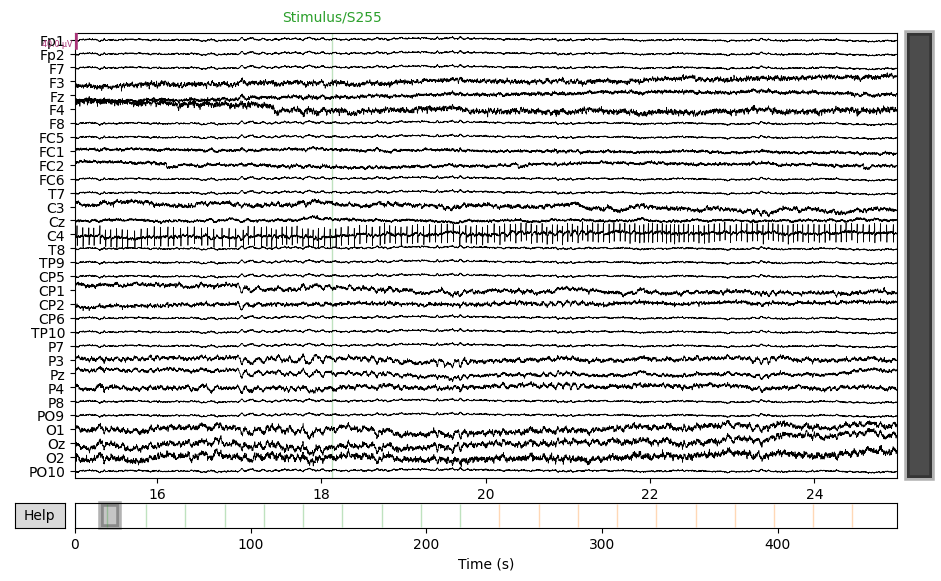

In [ ]:
fig = raw.plot(start=15, duration=10, n_channels=len(raw.ch_names), show=False);
fig.set_size_inches(10,6)

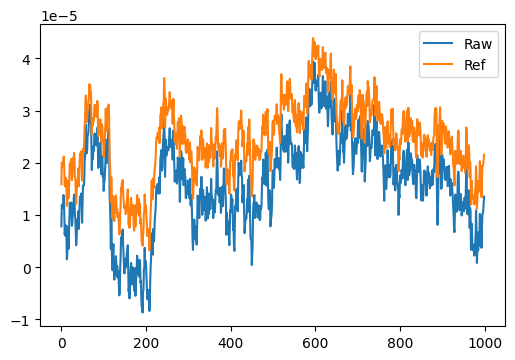

In [ ]:
plt.figure()
plt.plot(o1_raw[:1000])
plt.plot(o1_ref[:1000])
plt.legend(['Raw', 'Ref'])

# Фильтрация данных

- Избавиться от дрефов
- Избавиться от медленных физиологических артефактов, связанных дыханием или движением

In [ ]:
raw.filter(l_freq=0.1, h_freq=None)


<RawBrainVision | sub-02_ses-01_task-ssvep_eeg.eeg, 32 x 467580 (467.6 s), ~114.2 MB, data loaded>

In [ ]:
o1_filt = raw.get_data(picks=['O1'])[0]

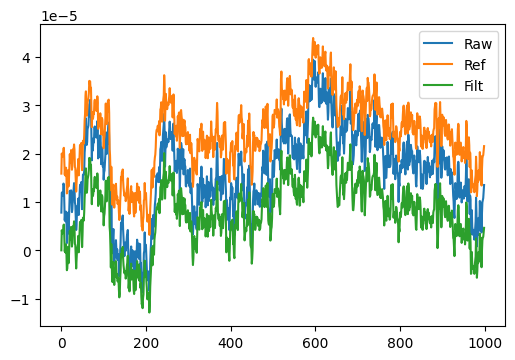

In [ ]:
plt.figure()
plt.plot(o1_raw[:1000])
plt.plot(o1_ref[:1000])
plt.plot(o1_filt[:1000])
plt.legend(['Raw', 'Ref', 'Filt'])

## API для фильтрации данных


In [ ]:
filt_data = mne.filter.filter_data([o1_raw, o1_ref, o1_filt], 
                                   raw.info['sfreq'], 
                                   copy=True, 
                                   l_freq=100, h_freq=None)

Setting up high-pass filter at 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 100.00
- Lower transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 87.50 Hz)
- Filter length: 133 samples (0.133 sec)



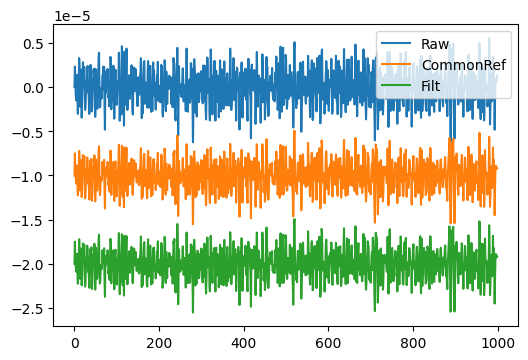

In [ ]:
plt.figure()
plt.plot(filt_data[:, :1000].T - np.arange(3)*10e-6)
plt.legend(['Raw', 'CommonRef', 'Filt'])

(-1e-05, 3e-05)

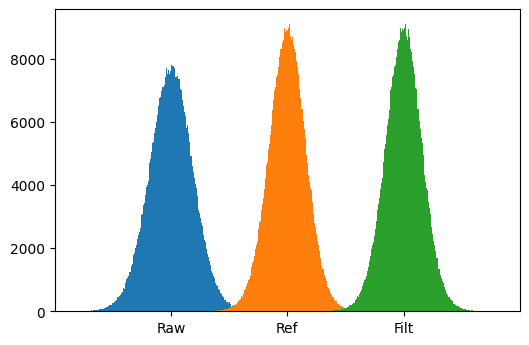

In [ ]:
plt.figure()
for i, f in enumerate(filt_data):
  plt.hist(f + i*10e-6, bins=1000)
plt.xticks(np.arange(3)*10e-6, 
           ['Raw', 'Ref', 'Filt'])

plt.xlim(-10e-6, 30e-6)

In [ ]:
filt_data[:, :1000].std(-1)

array([2.00578098e-06, 1.72618801e-06, 1.72618866e-06])

([<matplotlib.axis.XTick at 0x7f7b64972d10>,
 [Text(0, 0, 'Raw'), Text(0, 0, 'Ref'), Text(0, 0, 'Filt')])

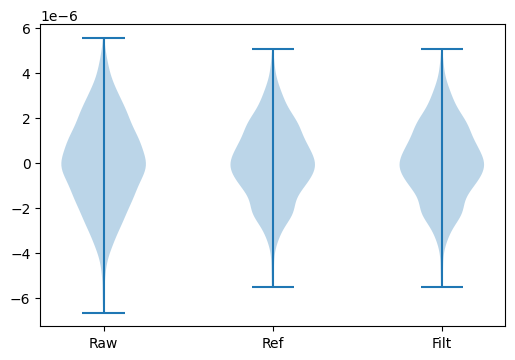

In [ ]:
plt.figure()
plt.violinplot(filt_data[:, :1000].T, )
plt.xticks([1,2,3], ['Raw', 'Ref', 'Filt'])

# События и аннотации (events and annotations)

Setting up band-pass filter from 10 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 10.00, 40.00 Hz: -6.02, -6.02 dB



/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


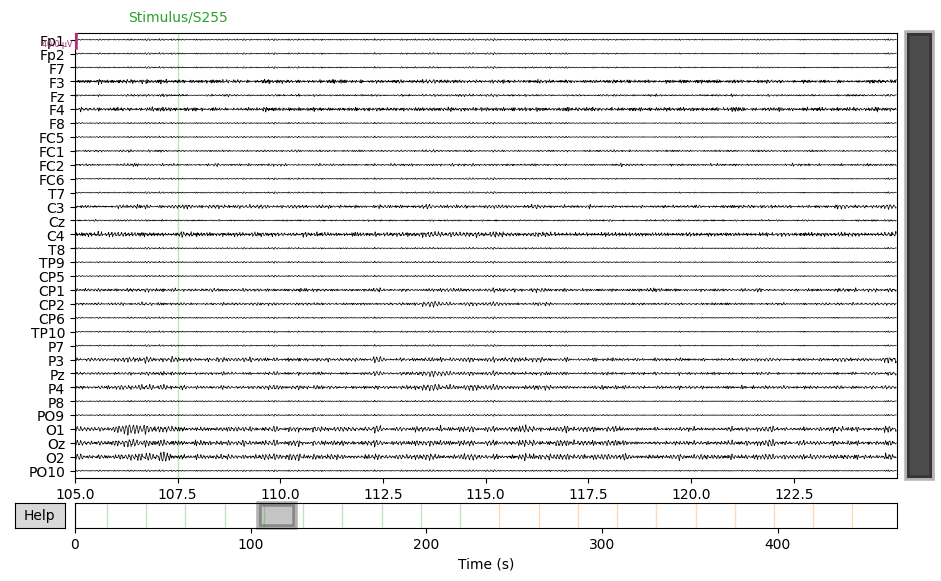

In [ ]:
# 109 и 350
fig = raw.plot(start=105,  
               duration=20, 
               n_channels=len(raw.ch_names), 
               show=False, lowpass=40, highpass=10);
fig.set_size_inches(10,6)

In [ ]:
raw.annotations[1]

OrderedDict([('onset', 18.126),
             ('duration', 0.001),
             ('description', 'Stimulus/S255'),
             ('orig_time',
              datetime.datetime(2018, 9, 27, 14, 48, 36, 58302, tzinfo=datetime.timezone.utc))])

In [ ]:
events, event_id = mne.events_from_annotations(raw, verbose=False)
event_id, events

({'New Segment/': 99999, 'Stimulus/S155': 155, 'Stimulus/S255': 255},
 array([[     0,      0,  99999],
        [ 18126,      0,    255],
        [ 40468,      0,    255],
        [ 62835,      0,    255],
        [ 85169,      0,    255],
        [107520,      0,    255],
        [129853,      0,    255],
        [152186,      0,    255],
        [174520,      0,    255],
        [196853,      0,    255],
        [219187,      0,    255],
        [241521,      0,    155],
        [263855,      0,    155],
        [286188,      0,    155],
        [308522,      0,    155],
        [330856,      0,    155],
        [353189,      0,    155],
        [375523,      0,    155],
        [397856,      0,    155],
        [420190,      0,    155],
        [442524,      0,    155]]))

In [ ]:
f'Время между стимулами {(np.median(np.diff(events[:,0]))/raw.info["sfreq"]):.3f}с'

'Время между стимулами 22.334с'

In [ ]:
event_id = {
    '12hz': 255,
    '15hz': 155
}

# Сегментация на эпохи (Epoch segmentation)

In [ ]:
epochs = mne.Epochs(raw, 
                    events=events, 
                    event_id=event_id, 
                    tmin=-2,
                    tmax=20,
                    baseline=None, 
                    verbose=True,
                    preload=True)

epochs

Not setting metadata
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Loading data for 20 events and 22001 original time points ...
0 bad epochs dropped


Number of events,20
Events,12hz: 1015hz: 10
Time range,-2.000 – 20.000 sec
Baseline,off


<ipython-input-158-3815341febd1>:1: RuntimeWarning: The measurement information indicates a low-pass frequency of 1000 Hz. The decim=100 parameter will result in a sampling frequency of 10 Hz, which can cause aliasing artifacts.
  fig = epochs['12hz'].plot(n_channels=len(epochs.ch_names), decim=100, show=False, events=events);
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


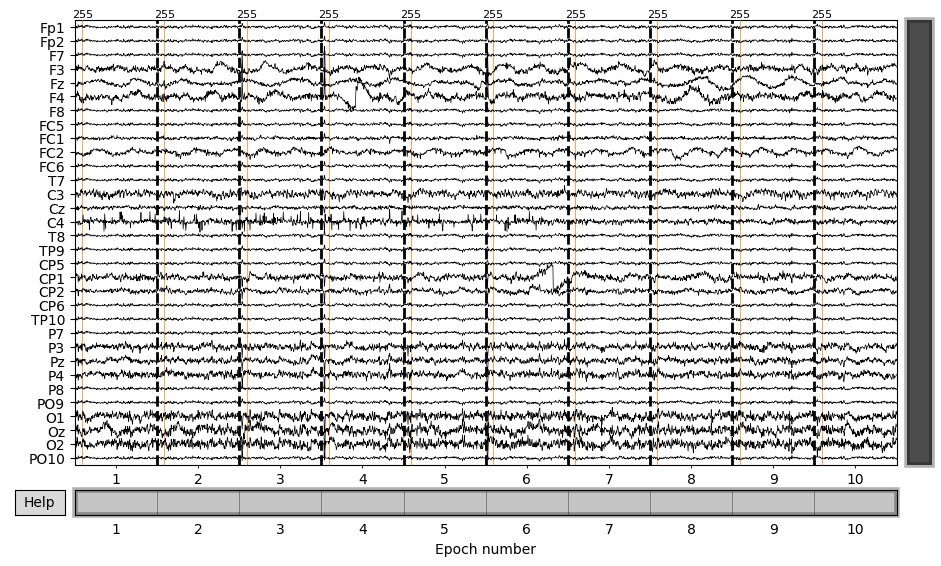

In [ ]:
 fig = epochs['12hz'].plot(n_channels=len(epochs.ch_names), decim=100, show=False, events=events);
 fig.set_size_inches(10,6)

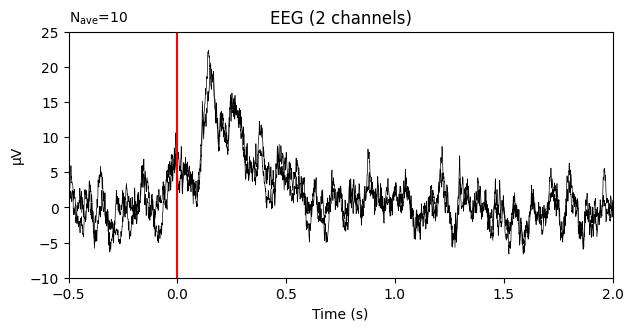

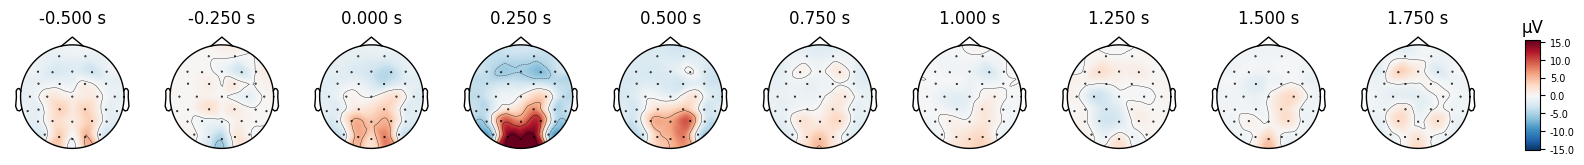

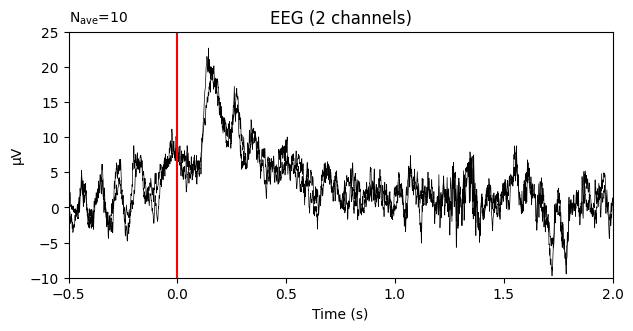

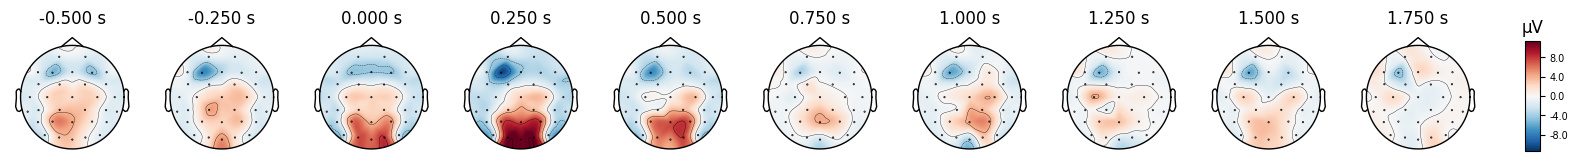

In [ ]:
av = epochs['12hz'].average();
fig = av.plot(picks=['O1', 'O2'], xlim=(-0.5, 2), show=False);
plt.axvline(0, color='r')
plt.ylim(-10, 25)
av.plot_topomap(times=np.arange(-0.5, 2.0, 0.25));


av = epochs['15hz'].average();
fig = av.plot(picks=['O1', 'O2'], xlim=(-0.5, 2), show=False);
plt.axvline(0, color='r')
plt.ylim(-10, 25)
av.plot_topomap(times=np.arange(-0.5, 2.0, 0.25));

# Частотно-временной анализ

In [ ]:
freqs = np.arange(10, 45, 1)
tfr_12 = mne.time_frequency.tfr_morlet(epochs['12hz'], 
                                    freqs=freqs, 
                                    n_cycles=7, 
                                    output='power', 
                                    verbose=True, 
                                    picks=['O2'],
                                    return_itc=False,
                                    average=True)

tfr_15 = mne.time_frequency.tfr_morlet(epochs['15hz'], 
                                    freqs=freqs, 
                                    n_cycles=7, 
                                    output='power', 
                                    verbose=True, 
                                    picks=['O2'],
                                    return_itc=False,
                                    average=True)

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


Text(0.5, 1.0, '15Hz')

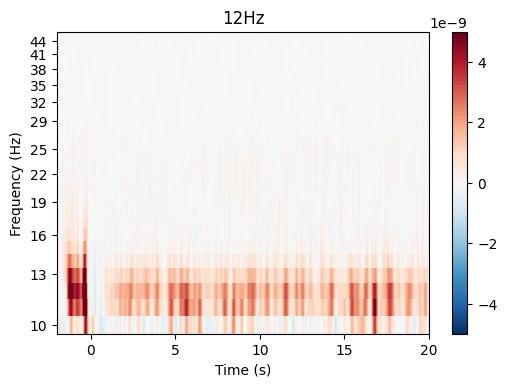

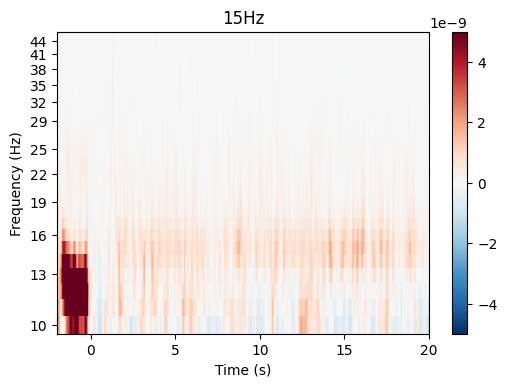

In [ ]:
fig = tfr_12.plot(yscale='log', show=False, baseline=[0,1], vmin=-5e-9, vmax=5e-9);
fig[0].gca().set_title('12Hz')

fig = tfr_15.plot(yscale='log', show=False, baseline=[0,1], vmin=-5e-9, vmax=5e-9);
fig[0].gca().set_title('15Hz')

In [ ]:
psds_12, freqs = mne.time_frequency.psd_welch(
        epochs["12hz"], n_fft=2048,
        n_overlap=0, 
        n_per_seg=None,
        tmin=1, tmax=20,
        fmin=1, fmax=35,
        window='boxcar',
        verbose=True)

psds_15, freqs = mne.time_frequency.psd_welch(
        epochs["15hz"], n_fft=2048,
        n_overlap=0, 
        n_per_seg=None,
        tmin=1, tmax=20,
        fmin=1, fmax=35,
        window='boxcar',
        verbose=True)

Effective window size : 2.048 (s)
Effective window size : 2.048 (s)


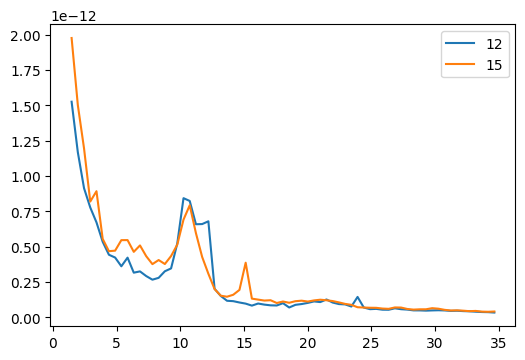

In [ ]:
plt.figure()
plt.plot(freqs, psds_12.mean(0).mean(0).T)
plt.plot(freqs, psds_15.mean(0).mean(0).T)
plt.legend(['12', '15'])

# Дифференциальные карты/кривые

Относительная разница между $Condition_1$ и $Condition_2$:  $\frac{Condition_1 - Condition_{average}}{Condition_{average}}$

$Condition_{average} = (Condition_1+Condition_2)/2$

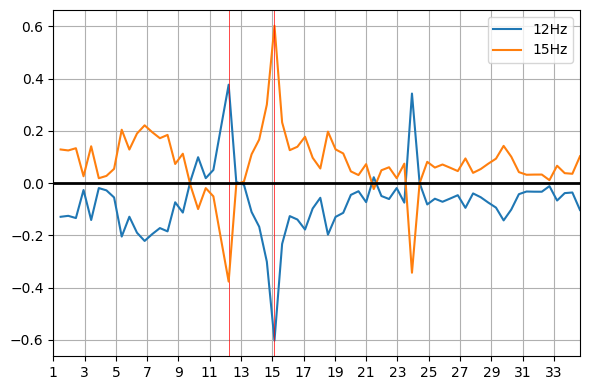

In [ ]:
psds_av = 0.5*(psds_15.mean(0).mean(0)+ psds_12.mean(0).mean(0))

plt.figure()
metrics = (psds_12).mean(0).mean(0)/psds_av -1
plt.plot(freqs, metrics)
plt.axvline(freqs[metrics.argmax()], color='r', lw=0.5, label='_nolegend_')

metrics = (psds_15).mean(0).mean(0)/psds_av -1
plt.plot(freqs, metrics)
plt.axvline(freqs[metrics.argmax()], color='r', lw=0.5, label='_nolegend_')
plt.legend(['12Hz', '15Hz'])
plt.axhline(0, color='k', lw=2)

plt.grid(True)
plt.xlim(freqs.min(), freqs.max())
plt.xticks(np.arange(1,35,2))

plt.tight_layout()

# Разделение классов

In [ ]:
psds_12, freqs = mne.time_frequency.psd_welch(
        epochs["12hz"], n_fft=2048,
        n_overlap=0, 
        n_per_seg=None,
        tmin=1, tmax=20,
        fmin=1, fmax=35,
        window='boxcar',
        verbose=True,
        picks=['O1', 'O2'])

psds_15, freqs = mne.time_frequency.psd_welch(
        epochs["15hz"], n_fft=2048,
        n_overlap=0, 
        n_per_seg=None,
        tmin=1, tmax=20,
        fmin=1, fmax=35,
        window='boxcar',
        verbose=True,
        picks=['O1', 'O2'])

Effective window size : 2.048 (s)
Effective window size : 2.048 (s)


In [ ]:
freqs.shape

(69,)

In [ ]:
psds_12.shape

(10, 2, 69)

In [ ]:
all_psds = np.concatenate([psds_12, psds_15], axis=0)
all_psds.shape

(20, 2, 69)

In [ ]:
X = all_psds.mean(1)
X.shape

(20, 69)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

pv = pca.fit_transform(X)

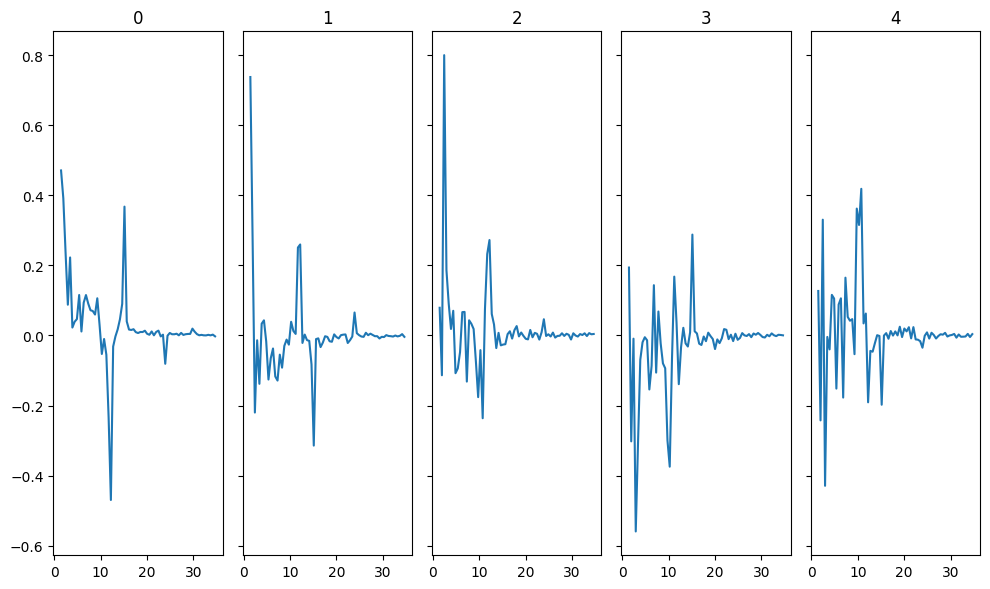

In [ ]:
fig, axx = plt.subplots(1, pca.n_components, figsize=(10, 6), sharey=True)
for i, (ax, c) in enumerate(zip(axx, pca.components_)):
  plt.sca(ax)
  plt.plot(freqs, c)
  plt.title(f'{i}')

plt.tight_layout()

In [ ]:
y=[12]*10 + [15]*10 

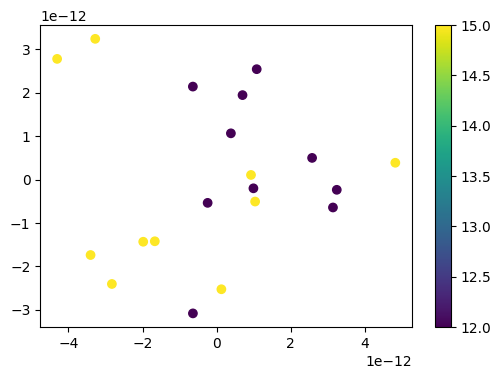

In [ ]:
plt.figure()
plt.scatter(pv[:,1], pv[:,2], c=y)
plt.colorbar()

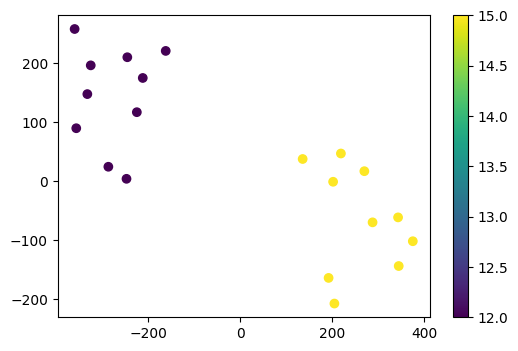

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE( perplexity=5)

tv = tsne.fit_transform(pv)

plt.figure()
plt.scatter(*(tv.T), c=y)

plt.colorbar()

# Статистические оценки

In [ ]:
from scipy.stats import ttest_ind

for i in range(pca.n_components):
  print('Component', i, ttest_ind(pv[:10, i], pv[10:, i]))

Component 0 Ttest_indResult(statistic=-6.475223807954645, pvalue=4.321915853980338e-06)
Component 1 Ttest_indResult(statistic=2.124390050797601, pvalue=0.047748347073866576)
Component 2 Ttest_indResult(statistic=0.8446898233911415, pvalue=0.4093712799245792)
Component 3 Ttest_indResult(statistic=-0.38842724170123816, pvalue=0.7022558195668533)
Component 4 Ttest_indResult(statistic=-0.28447130216524047, pvalue=0.7792960212890949)


# Пространственное распространение


In [ ]:
psds_12, freqs = mne.time_frequency.psd_welch(
        epochs["12hz"], n_fft=2048,
        n_overlap=0, 
        n_per_seg=None,
        tmin=1, tmax=20,
        fmin=1, fmax=35,
        window='boxcar',
        verbose=True,
        picks=['all'])

psds_15, freqs = mne.time_frequency.psd_welch(
        epochs["15hz"], n_fft=2048,
        n_overlap=0, 
        n_per_seg=None,
        tmin=1, tmax=20,
        fmin=1, fmax=35,
        window='boxcar',
        verbose=True,
        picks=['all'])

Effective window size : 2.048 (s)
Effective window size : 2.048 (s)


In [ ]:
psds_12.shape

(10, 32, 69)

In [ ]:
pv = pca.transform(psds_12.mean(0))
pv.shape


(32, 5)

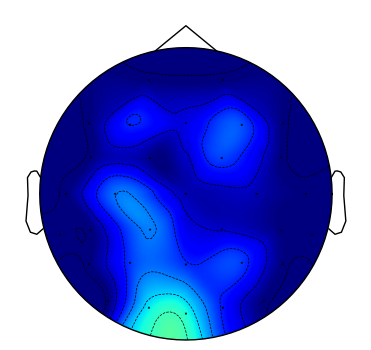

(<matplotlib.image.AxesImage at 0x7f7b60d7fd90>,
 <matplotlib.contour.QuadContourSet at 0x7f7b60d7f590>)

In [ ]:
mne.viz.plot_topomap(pv[:,0], pos=raw.info, cmap='jet')

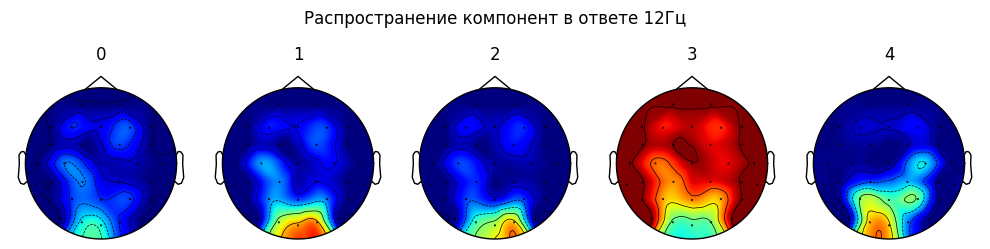

In [ ]:
pv = pca.transform(psds_12.mean(0))

fig, axx = plt.subplots(1,pca.n_components, figsize=(10,3))
for i, (p, ax) in enumerate(zip(pv.T, axx)):
  mne.viz.plot_topomap(p, pos=raw.info, cmap='jet', axes = ax, show=False)
  ax.set_title(i)

plt.suptitle('Распространение компонент в ответе 12Гц')

plt.tight_layout()

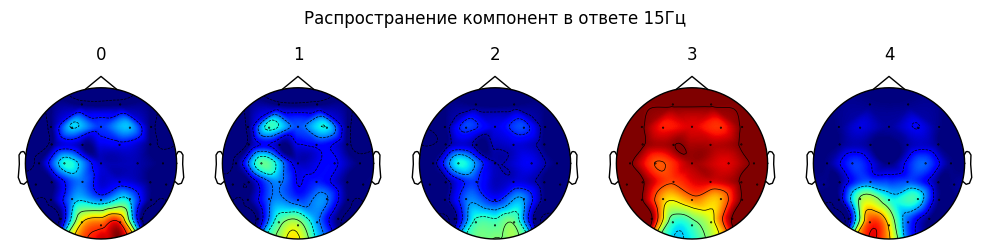

In [ ]:
pv = pca.transform(psds_15.mean(0))

fig, axx = plt.subplots(1,pca.n_components, figsize=(10,3))
for i, (p, ax) in enumerate(zip(pv.T, axx)):
  mne.viz.plot_topomap(p, pos=raw.info, cmap='jet', axes = ax, show=False)
  ax.set_title(i)

plt.suptitle('Распространение компонент в ответе 15Гц')

plt.tight_layout()

# Куда дальше?

- Установить jupyter дома, запустить этот же пример, но с интерактивом
- Mike Cohen courses and materials on Neural Data Analysis https://www.mikexcohen.com/
- ERP bootcamp https://erpinfo.org/the-erp-boot-camp
- ERP core https://erpinfo.org/erp-core
- NeurotechX http://learn.neurotechedu.com/